Basic read and plot functions for the TVC soil sensors

In [42]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
input_data = os.path.abspath("./data/hydraprobe")
station_files = []
staton_name = []
for file in os.listdir(input_data):
    if file.endswith(".xlsx"):
        staton_name.append(file.rsplit('_')[0])
        station_files.append(os.path.join(input_data, file))

In [27]:
soil_data =pd.DataFrame()
for idx, file in enumerate(station_files):
    station_data = pd.read_excel(file, header = 0, skiprows=1)
    station_data.drop(station_data.index[:3] , inplace=True)
    station_data['site'] = staton_name[idx]
    soil_data = soil_data.append(station_data,ignore_index=True)
    print(file)

C:\Users\kingj\My Documents\Projects\2019-2020\080419_TVC\tvc_soil\data\hydraprobe\CalTarget_TimeSeries_Updated_May7th.xlsx
C:\Users\kingj\My Documents\Projects\2019-2020\080419_TVC\tvc_soil\data\hydraprobe\DriftSite_TimeSeries_Updated_May7th.xlsx
C:\Users\kingj\My Documents\Projects\2019-2020\080419_TVC\tvc_soil\data\hydraprobe\MainMet_TimeSeries_Updated_May 7th.xlsx
C:\Users\kingj\My Documents\Projects\2019-2020\080419_TVC\tvc_soil\data\hydraprobe\OldTrench_TimeSeries_Updated_May7th.xlsx
C:\Users\kingj\My Documents\Projects\2019-2020\080419_TVC\tvc_soil\data\hydraprobe\SouthTundra_TimeSeries_Updated_May7th.xlsx
C:\Users\kingj\My Documents\Projects\2019-2020\080419_TVC\tvc_soil\data\hydraprobe\ValleyBottom_TimeSeries_Updated_May7th.xlsx


In [93]:
# Nan values from the data logger are showing up as an object
# rather than numeric so we fix this with a hack
for column in soil_data.filter(regex="Cor_Real_Permittivity"):
    soil_data[column] = pd.to_numeric(soil_data[column], errors='coerce')
    
for column in soil_data.filter(regex="Cor_Imaginary_Permittivity"):
    soil_data[column] = pd.to_numeric(soil_data[column], errors='coerce')    

In [94]:
# There are 4 permittivity sensrs at each station with resignation H*
# The H*_Cor_*_Permittivity meaurements represent the temperature corrected e' and e''
# Here we just take the mean of the 4 to represent the site at each time step

soil_data['corrected_permittivity_real'] = soil_data.filter(regex="Cor_Real_Permittivity").mean(axis=1)
soil_data['corrected_permittivity_imag'] = soil_data.filter(regex="Cor_Imaginary_Permittivity").mean(axis=1)

# Convert the data logger time to a timestamp
# Data is available in 30 min intervals right now
soil_data['time_stamp'] = pd.to_datetime(soil_data.TIMESTAMP)


Text(0, 0.5, 'Permittivity Re [-]')

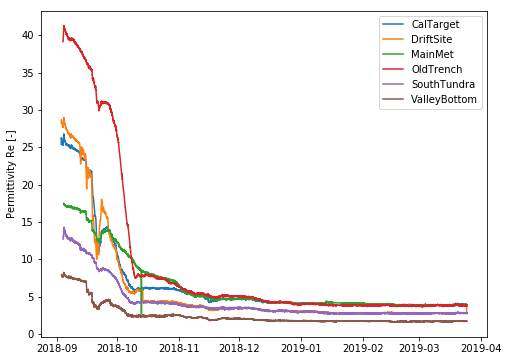

In [95]:
fig, ax = plt.subplots(figsize=(8,6))
for group, df in soil_data.groupby('site'):
    plt.plot(df['time_stamp'], df['corrected_permittivity_real'], label=group)
plt.legend()
plt.ylabel('Permittivity Re [-]')